##  Exploring the ratings of restaurants in India

Zomato is a restaurant reviews aggregator site which provides a platform for restaurant goers to review various restaurants they have visited. This data has been obtained from Kaggle datasets. 



In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploring the Data

In [2]:
data = pd.read_csv('zomato.csv', encoding = "ISO-8859-1")

In [3]:
data.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

In [4]:
data.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...           Currency Has Table booking  \
0        French, Japanese, Desserts  ...   Botswana Pula(P)               Yes   
1                          Japanese  ...   Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...   Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...   Botswana Pula(P)                No   
4                  Japanese, Korean  ...   Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [5]:
country_code = pd.read_excel('Country-Code.xlsx')

In [6]:
country_code.head()

Country Code    Country
0             1      India
1            14  Australia
2            30     Brazil
3            37     Canada
4            94  Indonesia

### Let's have a look at the restaurants in India

We need to get the country code of India first. Although we see that directly here that the country code is 1 for India, it would be a good exercise to try to extract it from the data at hand.

In [7]:
country_code[country_code['Country'] == 'India']['Country Code']

0    1
Name: Country Code, dtype: int64

Thus the country code is 1, it is possible to find the country code of any other country using the above command.

In [8]:
data_india = data[data['Country Code'] == 1]

In [9]:
data_india.head()

Restaurant ID                        Restaurant Name  Country Code  City  \
624        3400025                             Jahanpanah             1  Agra   
625        3400341                    Rangrezz Restaurant             1  Agra   
626        3400005                Time2Eat - Mama Chicken             1  Agra   
627        3400021  Chokho Jeeman Marwari Jain Bhojanalya             1  Agra   
628        3400017                         Pinch Of Spice             1  Agra   

                                               Address     Locality  \
624  E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...   Agra Cantt   
625  E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...   Agra Cantt   
626        Main Market, Sadar Bazaar, Agra Cantt, Agra   Agra Cantt   
627  1/48, Delhi Gate, Station Road, Raja Mandi, Ci...  Civil Lines   
628  23/453, Opposite Sanjay Cinema, Wazipura Road,...  Civil Lines   

      Locality Verbose  Longitude   Latitude                        Cuisines  \
624   Agra Cantt, Agra  78.011544  27.161661           North Indian, Mughlai   
625   Agra Cantt, Agra   0.000000   0.000000           North Indian, Mughlai   
626   Agra Cantt, Agra  78.011608  27.160832                    North Indian   
627  Civil Lines, Agra  77.998092  27.195928                      Rajasthani   
628  Civil Lines, Agra  78.007553  27.201725  North Indian, Chinese, Mughlai   

     ...             Currency Has Table booking Has Online delivery  \
624  ...   Indian Rupees(Rs.)                No                  No   
625  ...   Indian Rupees(Rs.)                No                  No   
626  ...   Indian Rupees(Rs.)                No                  No   
627  ...   Indian Rupees(Rs.)                No                  No   
628  ...   Indian Rupees(Rs.)                No                  No   

    Is delivering now Switch to order menu Price range  Aggregate rating  \
624                No                   No           3               3.9   
625                No                   No           2               3.5   
626                No                   No           2               3.6   
627                No                   No           2               4.0   
628                No                   No           3               4.2   

     Rating color Rating text Votes  
624        Yellow        Good   140  
625        Yellow        Good    71  
626        Yellow        Good    94  
627         Green   Very Good    87  
628         Green   Very Good   177  

[5 rows x 21 columns]

#### Finding the list of cuisines available in Indian restaurants

In [10]:
data_india['Cuisines'].unique()

array(['North Indian, Mughlai', 'North Indian', 'Rajasthani', ...,
       'Continental, Seafood, Chinese, North Indian, Biryani',
       'Burger, Pizza, Biryani',
       'American, North Indian, Thai, Continental'], dtype=object)

#### Total no of cuisines 

In [11]:
data_india['Cuisines'].nunique()

1392

#### Total no. of restaurants in India

In [12]:
data_india['Restaurant ID'].nunique()

8652

In [13]:
data_india.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

Most of the restaurants covered by Zomata ratings and reviews seems to be in India in this particular data set. 

### What are we looking for?

As we go along with the analysis we will try to find out what factors influences the ratings of the restaurants. The ability to book a table for example might influence how a potential customer leaves a rating. Another important factor would be the authenticity of the cuisine being served. As a general rule of thumb one might say that a multi-cuisine restaurant might be less authentic than one that serves only one type of cuisine. I will try to cover such aspects in this analysis:

In [14]:
sns.set(font_scale=1.2, rc={'figure.figsize':(8,5)})
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

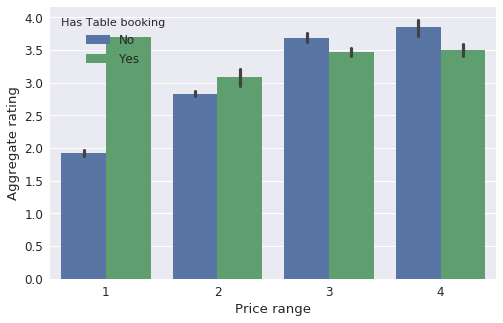

In [15]:
sns.barplot(x="Price range", y='Aggregate rating', hue='Has Table booking', data=data_india)

It seems that for restaurants that are more affordable (has a lower price range) have higher ratings if they provide table booking services.For pricier restaurants table booking option does not seem to affect the ratings much.

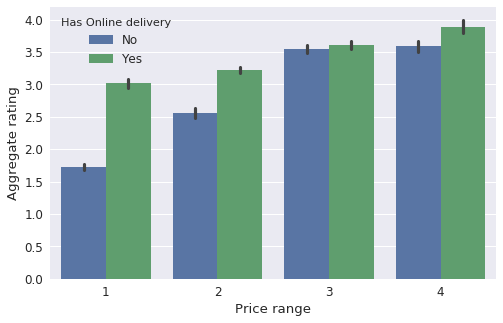

In [16]:
sns.barplot(x="Price range", y='Aggregate rating', hue='Has Online delivery', data=data_india)

Again for restaurants that are in the lower price range (1 and 2) seems to have better average rating if they provide online delivery services. This is not so signficant for the restaurants falling in the pricier category.

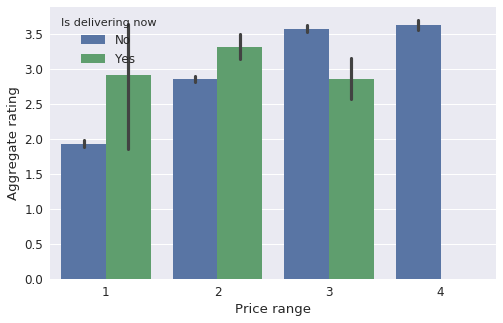

In [17]:
sns.barplot(x="Price range", y='Aggregate rating', hue='Is delivering now', data=data_india)

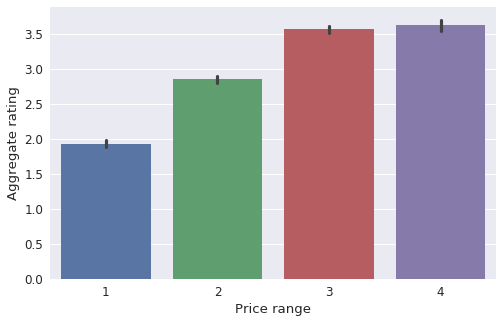

In [18]:
sns.barplot(x="Price range", y='Aggregate rating', data=data_india)

The 'Switch to order menu' service is not provided by any of the restaurants that have been reviewed in Zomato. But this interestingly shows the general trend of ratings provided by the users. The lower price restaurants in general have worser ratings compared to the pricier ones. There is essentially little difference in the ratings of price categories 1 and 2.

### Cuisines provided by the restaurants
The above restaurants are a mix of single cusine and multi-cuisine restaurant. The rating of restaurants will be affected by the authenticity of the cuisine they are serving. I will first make a column of cusines that is served by the restaurants.

In [19]:
def cusines_count(text):
    x = text.split(',')
    return len(x)

In [20]:
x = data_india['Cuisines'].apply(cusines_count)

In [21]:
x = x.rename("No. of cuisines")

In [22]:
x.name

'No. of cuisines'

In [23]:
data_modified = pd.concat([data_india, x], axis= 1)

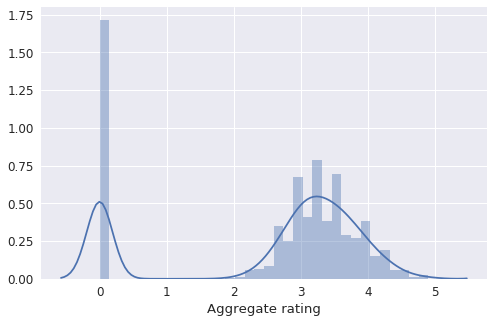

In [24]:
#Mean of all ratings
sns.distplot(data_modified['Aggregate rating'])

There are a lot of unrated restaurants in this dataset which would not contribute to understanding the dynamics of restaurant goers in India. We will remove all this data points to have a more representative sample. It might be possible to predict the ratings of those restaurants based on the characteristics of the restaurants that have already been rated.

Let us now remove the data points that do not have any votes or ratings

In [25]:
data_rated_restaurants = data_modified[(data_modified['Aggregate rating']>0)&(data_modified['Votes']>0)]

In [26]:
data_rated_restaurants.shape

(6513, 22)

Let us have another look now at the distribution of aggregrate ratings among all restaurants.

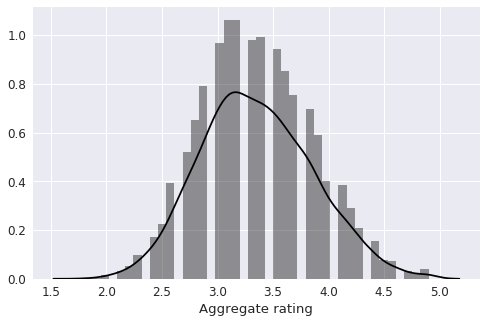

In [27]:
sns.distplot(data_rated_restaurants['Aggregate rating'], color='k')

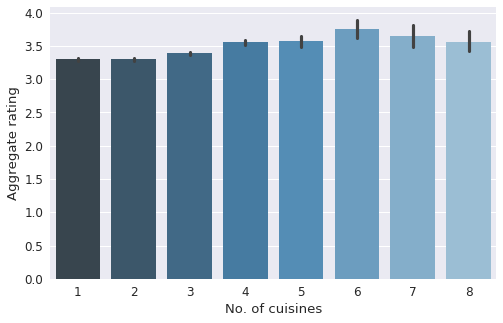

In [28]:
sns.barplot(x ='No. of cuisines', y = 'Aggregate rating', data= data_rated_restaurants, palette="Blues_d" )

This is very interesting situation. It seems that contrary to my own expectations, it seems that multi-cusine restaurants in India seems to have a little better aggregrate rating. It would be interesting to see the distribution divided between the four price ranges

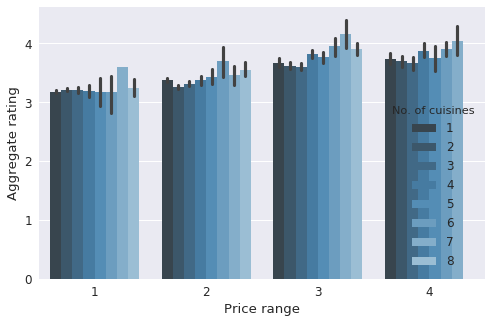

In [29]:
sns.barplot(x ="Price range", y = 'Aggregate rating', hue= 'No. of cuisines', data= data_rated_restaurants, palette="Blues_d" )

The trend of the aggregate rating being better for multicuisine restaurant seems to be valid for all the price range of restaurants. Thus in India it is likely that if you have a multi-cuisine restaurant it would probably get better ratings. Additionally, the highest price category restaurants provide no more than 7 cuisines.


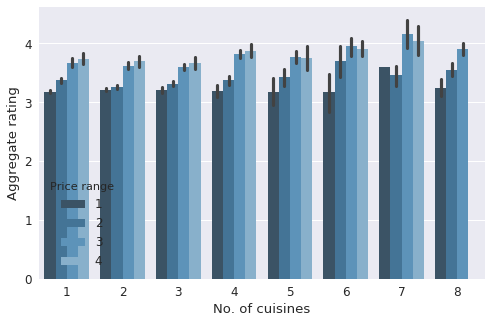

In [30]:
sns.barplot(x ='No. of cuisines', y = 'Aggregate rating', hue="Price range" , data= data_rated_restaurants, palette="Blues_d" )

In [31]:
data_rated_restaurants.head()

Restaurant ID                        Restaurant Name  Country Code  City  \
624        3400025                             Jahanpanah             1  Agra   
625        3400341                    Rangrezz Restaurant             1  Agra   
626        3400005                Time2Eat - Mama Chicken             1  Agra   
627        3400021  Chokho Jeeman Marwari Jain Bhojanalya             1  Agra   
628        3400017                         Pinch Of Spice             1  Agra   

                                               Address     Locality  \
624  E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...   Agra Cantt   
625  E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...   Agra Cantt   
626        Main Market, Sadar Bazaar, Agra Cantt, Agra   Agra Cantt   
627  1/48, Delhi Gate, Station Road, Raja Mandi, Ci...  Civil Lines   
628  23/453, Opposite Sanjay Cinema, Wazipura Road,...  Civil Lines   

      Locality Verbose  Longitude   Latitude                        Cuisines  \
624   Agra Cantt, Agra  78.011544  27.161661           North Indian, Mughlai   
625   Agra Cantt, Agra   0.000000   0.000000           North Indian, Mughlai   
626   Agra Cantt, Agra  78.011608  27.160832                    North Indian   
627  Civil Lines, Agra  77.998092  27.195928                      Rajasthani   
628  Civil Lines, Agra  78.007553  27.201725  North Indian, Chinese, Mughlai   

          ...        Has Table booking Has Online delivery Is delivering now  \
624       ...                       No                  No                No   
625       ...                       No                  No                No   
626       ...                       No                  No                No   
627       ...                       No                  No                No   
628       ...                       No                  No                No   

    Switch to order menu Price range Aggregate rating  Rating color  \
624                   No           3              3.9        Yellow   
625                   No           2              3.5        Yellow   
626                   No           2              3.6        Yellow   
627                   No           2              4.0         Green   
628                   No           3              4.2         Green   

     Rating text Votes No. of cuisines  
624         Good   140               2  
625         Good    71               2  
626         Good    94               1  
627    Very Good    87               1  
628    Very Good   177               3  

[5 rows x 22 columns]

Another important parameter to know the is number of footfalls of each restaurants. However what we have here is the number of reviewers which is only proportional to the total number of footfalls over a given duration. Since the duration during which the reviews were obtained are not given, we will assume this to be the same for all restaurants as of now to have a general idea about the number of people who visit the restaurant. The number of footfalls per restaurant should also depend on the population of the city in which the restaurant is located, the location itself, cuisine etc. Curiously enough a better aggregate rating should also contribute to the number of footfalls. 

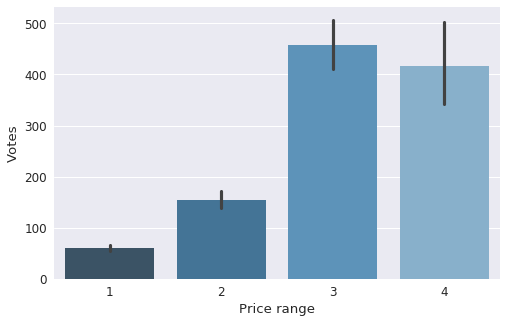

In [32]:
sns.barplot(x ="Price range", y = 'Votes', data= data_rated_restaurants, palette="Blues_d" )

The more pricier restaurants seems to have larger number of reviews which implies the pricier restaurants seems to have a better footfall. It might be also possible that people who visit these restaurants are more internet savvy and likely to leave a review. Let us look at the relation between average rating and number of votes:

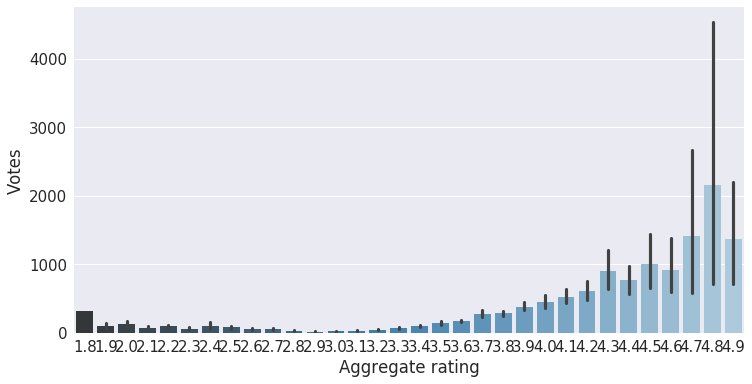

In [33]:
sns.set(font_scale=1.5, rc={'figure.figsize':(12,6)})
sns.barplot('Aggregate rating', 'Votes', data= data_rated_restaurants, palette="Blues_d")

The above plot shows that the average votes received are disproportionately higher in the case of restaurants with higher ratings. Also the variability of footfalls is also large for the highly rated restaurants. This might be because there might be new restaurants which has better aggregate rating. However since the data does not mention the period during which the restaurants were obtained this is just a speculation. The location of the restaurant, how easily it is accessible by public transport, the population density in the region where it is located, whether it is closer to the center of the city etc. will also similarly play a role in determining the number of footfalls. 

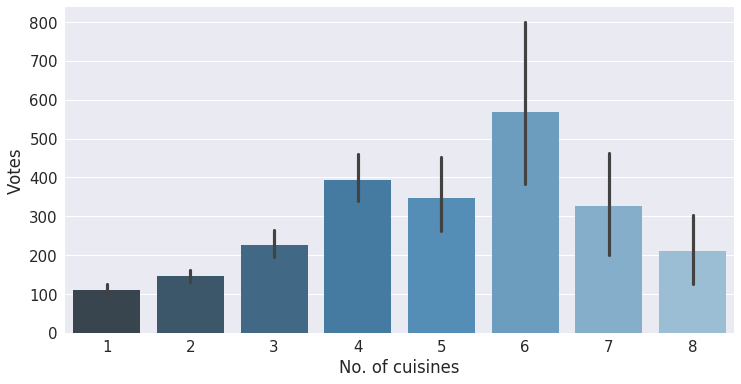

In [34]:
sns.set(font_scale=1.5, rc={'figure.figsize':(12,6)})
sns.barplot('No. of cuisines', 'Votes', data= data_rated_restaurants, palette="Blues_d")

The average votes received are also higher for restaurants that are multi-cuisine. It would be also be interesting to see the voting amoung different number of cuisines provided.

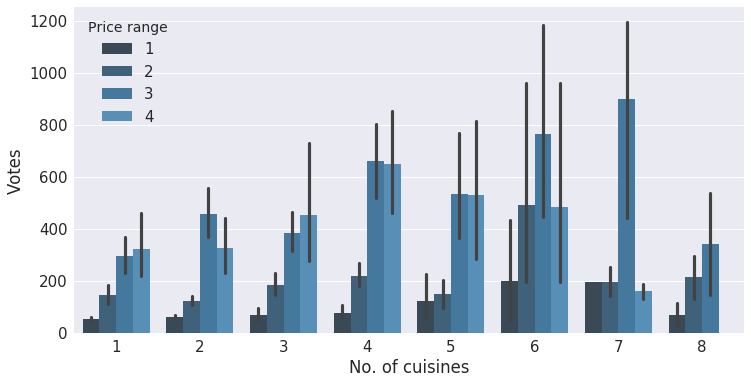

In [35]:
sns.barplot('No. of cuisines', 'Votes', hue= 'Price range', data= data_rated_restaurants, palette=sns.color_palette("Blues_d"))

### Cities 
It would also be interesting to know the cities in India where these restaurants are located. 

In [36]:
print(data_rated_restaurants['City'].unique())
print(data_rated_restaurants['City'].nunique())

['Agra' 'Ahmedabad' 'Allahabad' 'Amritsar' 'Aurangabad' 'Bangalore'
 'Bhopal' 'Bhubaneshwar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Dehradun'
 'Faridabad' 'Ghaziabad' 'Goa' 'Gurgaon' 'Guwahati' 'Hyderabad' 'Indore'
 'Jaipur' 'Kanpur' 'Kochi' 'Kolkata' 'Lucknow' 'Ludhiana' 'Mangalore'
 'Mohali' 'Mumbai' 'Mysore' 'Nagpur' 'Nashik' 'New Delhi' 'Noida'
 'Panchkula' 'Patna' 'Puducherry' 'Pune' 'Ranchi' 'Secunderabad' 'Surat'
 'Vadodara' 'Varanasi' 'Vizag']
43


It would be interesting to see which in which people use Zomato to rate the restaurants. The total number of votes in each city could also be a measure of the popularity of Zomato in that city (or state in which the city is located). 

### Most Popular cuisines

In the above restaurants we have both single cuisine and multi-cuisine restaurants. We first need to make the list of all available cuisines across all restaurants. I will try to generate the list of cuisines that are provided by all the restaurants above.

In [37]:
cuisine = []
list_of_cuisines = data_modified.iloc[:,9]
len(list_of_cuisines)

8652

In [38]:
for x in list_of_cuisines:
    y = x.split(', ')
    for i in y:
        if not(i in cuisine):
            cuisine.append(i)
        else:
            pass
        

In [39]:
print(cuisine, 'total no. of cuisines {}'.format(len(cuisine)))

['North Indian', 'Mughlai', 'Rajasthani', 'Chinese', 'European', 'Gujarati', 'Continental', 'South Indian', 'Desserts', 'Cafe', 'Italian', 'Mexican', 'Pizza', 'Fast Food', 'Mediterranean', 'Thai', 'Ice Cream', 'Beverages', 'Asian', 'Street Food', 'Sandwich', 'Burger', 'Healthy Food', 'American', 'Armenian', 'Salad', 'Bakery', 'Mithai', 'Biryani', 'Juices', 'Maharashtrian', 'Hyderabadi', 'Modern Indian', 'Finger Food', 'Tex-Mex', 'Arabian', 'Charcoal Grill', 'Steak', 'Seafood', 'Tea', 'Japanese', 'Malaysian', 'Burmese', 'Chettinad', 'Spanish', 'Greek', 'Indian', 'Parsi', 'Tibetan', 'Raw Meats', 'French', 'Goan', 'German', 'Kerala', 'Lebanese', 'Belgian', 'Kashmiri', 'Sushi', 'South American', 'Persian', 'Bengali', 'Portuguese', 'African', 'Iranian', 'Vietnamese', 'Lucknowi', 'Korean', 'Awadhi', 'Nepalese', 'Drinks Only', 'Pakistani', 'North Eastern', 'Oriya', 'Bihari', 'Afghani', 'Middle Eastern', 'Indonesian', 'Assamese', 'Andhra', 'Mangalorean', 'British', 'Malwani', 'Cuisine Varies',

Above you can see the list of all cuisines that are served by the restaurants that have been rated by Zomato. There are in total 90 types of cuisines available in total. It would be really interesting to see which cuisines are the most popular among restaurant goers according to Zomato. This is a little challenging as seen from the analysis before as the most popular restaurants are most likely a multi-cuisine restaurant. It is most likely that a combination of particular cuisines seems to be the key to a successful rating. It is also possible that the popular multi-cuisine restaurants have one or two common cuisines. Cuisines served can definitely provide a clue to understanding the popularity of a restaurant.

In [40]:
list_ratings = data_modified.loc[:,'Aggregate rating']
len(list_ratings)

8652

In [41]:
ratings_per_cuisine = []
counts_per_cuisine = []
for cusi in cuisine:
    count = 0
    total_rating = 0
    for cuisines, ratings in zip(list_of_cuisines, list_ratings):
        if cusi in cuisines.split(', '):
            count+=1
            total_rating+=ratings
        else:
            pass
    ratings_per_cuisine.append(total_rating/count)
    counts_per_cuisine.append(count)
            

In [42]:
len(ratings_per_cuisine)

90

In [43]:
ratings_cuisines = pd.DataFrame({'Cuisines':cuisine, 'Average Rating':ratings_per_cuisine, 'Popularity':counts_per_cuisine} )

In [44]:
ratings_cuisines.head()

Average Rating      Cuisines  Popularity
0        2.505170  North Indian        3946
1        2.608073       Mughlai         991
2        3.135000    Rajasthani          20
3        2.598065       Chinese        2688
4        3.846218      European         119

In [45]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected= True)
cf.go_offline()

In [46]:
import plotly.graph_objs as go
data = [go.Bar(
            x=ratings_cuisines['Cuisines'],
            y=ratings_cuisines['Average Rating']
    )]

iplot(data, filename='basic-bar')

The above barplot gives and idea about the ratings per cuisine. But it would be more interesting know which type of cuisine is most likely consumed by the people rating on Zomato. For that we will do a similar plot for the occurrence of the cuisines across all restaurants:

In [47]:
import plotly.graph_objs as go
data = [go.Bar(
            x=ratings_cuisines['Cuisines'],
            y=ratings_cuisines['Popularity']
    )]

iplot(data, filename='basic-bar')

In [48]:
cities_states = pd.read_csv('list_of_cities_and_towns_in_india-834j.csv')

In [49]:
cities_states.head()

S.No Name of City        State                                  Type  \
0    1       Mumbai  Maharashtra   Municipal Corporation / Corporation   
1    2        Delhi        Delhi   Municipal Corporation / Corporation   
2    3    Bengaluru    Karnataka   Municipal Corporation / Corporation   
3    4    Ahmedabad      Gujarat  Municipal Corporation / Corporation.   
4    5    Hyderabad    Telangana   Municipal Corporation / Corporation   

  Population (2011) Population class  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0       1,35,97,924          Class I         NaN         NaN         NaN   
1       1,10,07,835          Class I         NaN         NaN         NaN   
2         84,25,970          Class I         NaN         NaN         NaN   
3         72,08,200          Class I         NaN         NaN         NaN   
4         68,09,970          Class I         NaN         NaN         NaN   

   Unnamed: 9  Unnamed: 10  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN

In [50]:
cities_states[cities_states['Name of City'] == 'Bengaluru']='Bangalore'
cities_states[cities_states['Name of City'] == 'Bhubaneswar']='Bhubaneshwar'
cities_states.head()

S.No Name of City        State                                  Type  \
0          1       Mumbai  Maharashtra   Municipal Corporation / Corporation   
1          2        Delhi        Delhi   Municipal Corporation / Corporation   
2  Bangalore    Bangalore    Bangalore                             Bangalore   
3          4    Ahmedabad      Gujarat  Municipal Corporation / Corporation.   
4          5    Hyderabad    Telangana   Municipal Corporation / Corporation   

  Population (2011) Population class Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0       1,35,97,924          Class I        NaN        NaN        NaN   
1       1,10,07,835          Class I        NaN        NaN        NaN   
2         Bangalore        Bangalore  Bangalore  Bangalore  Bangalore   
3         72,08,200          Class I        NaN        NaN        NaN   
4         68,09,970          Class I        NaN        NaN        NaN   

  Unnamed: 9 Unnamed: 10  
0        NaN         NaN  
1        NaN         NaN  
2  Bangalore   Bangalore  
3        NaN         NaN  
4        NaN         NaN

In [51]:
cities_with_restaurants = data_rated_restaurants['City'].unique()

In [52]:
city2totalrestaurants = {}

In [53]:
for city in cities_with_restaurants:
    
    city2totalrestaurants[city] =(data_rated_restaurants['City'] == city).sum()
    #city2totalrestaurants[city] =data_rated_restaurants[data_rated_restaurants['City'] == city]['Votes'].sum()

In [54]:
city2totalrestaurants

{'Agra': 20,
 'Ahmedabad': 21,
 'Allahabad': 20,
 'Amritsar': 21,
 'Aurangabad': 20,
 'Bangalore': 20,
 'Bhopal': 20,
 'Bhubaneshwar': 21,
 'Chandigarh': 18,
 'Chennai': 20,
 'Coimbatore': 20,
 'Dehradun': 20,
 'Faridabad': 151,
 'Ghaziabad': 23,
 'Goa': 20,
 'Gurgaon': 890,
 'Guwahati': 21,
 'Hyderabad': 18,
 'Indore': 20,
 'Jaipur': 20,
 'Kanpur': 20,
 'Kochi': 20,
 'Kolkata': 20,
 'Lucknow': 21,
 'Ludhiana': 20,
 'Mangalore': 20,
 'Mohali': 1,
 'Mumbai': 20,
 'Mysore': 20,
 'Nagpur': 20,
 'Nashik': 20,
 'New Delhi': 4048,
 'Noida': 696,
 'Panchkula': 1,
 'Patna': 20,
 'Puducherry': 20,
 'Pune': 20,
 'Ranchi': 20,
 'Secunderabad': 2,
 'Surat': 20,
 'Vadodara': 20,
 'Varanasi': 20,
 'Vizag': 20}

In [55]:
city2states = {}

In [56]:
cities_states = cities_states[['Name of City', 'State']].dropna()

In [57]:
cities_of_india = cities_states['Name of City'].unique()

In [58]:
for city in city2totalrestaurants:
    print(city)
    if city ==  'Ghaziabad':
        city2states['Ghaziabad'] = 'Uttar Pradesh'
    elif city == 'Goa':
        city2states['Goa'] = 'Goa'
    elif city == 'Mangalore':
        city2states[city] =  'Karnataka'
    elif city == 'Puducherry':
        city2states[city] = 'Puducherry'
    elif city == 'Secunderabad':
        city2states[city] = 'Telangana'
    elif city == 'Vizag':
        city2states[city] = 'Andhra Pradesh'
    else:
        
        city2states[city] = cities_states[cities_states['Name of City']==city]['State'].unique()[0]

Agra
Ahmedabad
Allahabad
Amritsar
Aurangabad
Bangalore
Bhopal
Bhubaneshwar
Chandigarh
Chennai
Coimbatore
Dehradun
Faridabad
Ghaziabad
Goa
Gurgaon
Guwahati
Hyderabad
Indore
Jaipur
Kanpur
Kochi
Kolkata
Lucknow
Ludhiana
Mangalore
Mohali
Mumbai
Mysore
Nagpur
Nashik
New Delhi
Noida
Panchkula
Patna
Puducherry
Pune
Ranchi
Secunderabad
Surat
Vadodara
Varanasi
Vizag


Turns out that we have many missing cities in this list and I had to put in some of the states myself. If you have a better list please feel free to use a better list and rewrite this code. Welcome to the real world of data science where most data is not clean.

In [80]:
cities_states[cities_states['Name of City']=='Bhubaneshwar']['State'].unique()[0]

'Bhubaneshwar'

In [81]:
city2states

{'Agra': 'Uttar Pradesh',
 'Ahmedabad': 'Gujarat',
 'Allahabad': 'Uttar Pradesh',
 'Amritsar': 'Punjab',
 'Aurangabad': 'Maharashtra',
 'Bangalore': 'Bangalore',
 'Bhopal': 'Madhya Pradesh',
 'Bhubaneshwar': 'Bhubaneshwar',
 'Chandigarh': 'Chandigarh',
 'Chennai': 'Tamil Nadu',
 'Coimbatore': 'Tamil Nadu',
 'Dehradun': 'Uttarakhand',
 'Faridabad': 'Haryana',
 'Ghaziabad': 'Uttar Pradesh',
 'Goa': 'Goa',
 'Gurgaon': 'Haryana',
 'Guwahati': 'Assam',
 'Hyderabad': 'Telangana',
 'Indore': 'Madhya Pradesh',
 'Jaipur': 'Rajasthan',
 'Kanpur': 'Uttar Pradesh',
 'Kochi': 'Kerala',
 'Kolkata': 'West Bengal',
 'Lucknow': 'Uttar Pradesh',
 'Ludhiana': 'Punjab',
 'Mangalore': 'Karnataka',
 'Mohali': 'Punjab',
 'Mumbai': 'Maharashtra',
 'Mysore': 'Karnatka',
 'Nagpur': 'Maharashtra',
 'Nashik': 'Maharashtra',
 'New Delhi': 'Delhi',
 'Noida': 'Uttar Pradesh',
 'Panchkula': 'Haryana',
 'Patna': 'Bihar',
 'Puducherry': 'Puducherry',
 'Pune': 'Maharashtra',
 'Ranchi': 'Jharkhand',
 'Secunderabad': 'Tel

In [82]:
city2states['Vizag']

'Andhra Pradesh'

In [83]:
statenames = cities_states['State'].unique()

In [84]:
#Initialize all key entries with zero
states2restaurants = dict.fromkeys(statenames, 0)

In [85]:
for city in city2states:
    if city in city2totalrestaurants:
        states2restaurants[city2states[city]] += city2totalrestaurants[city]
        

In [86]:
states2restaurants

{'Andaman and Nicobar Islands': 0,
 'Andhra Pradesh': 20,
 'Arunachal Pradesh': 0,
 'Assam': 21,
 'Bangalore': 20,
 'Bhubaneshwar': 21,
 'Bihar': 20,
 'Chandigarh': 18,
 'Chhattisgarh': 0,
 'Dadra and Nagar Haveli': 0,
 'Delhi': 4048,
 'Goa': 20,
 'Gujarat': 61,
 'Haryana': 1042,
 'Himachal Pradesh': 0,
 'Jammu and Kashmir': 0,
 'Jharkhand': 20,
 'Karnataka': 20,
 'Karnatka': 20,
 'Kerala': 20,
 'Madhya Pradesh': 40,
 'Maharashtra': 100,
 'Manipur': 0,
 'Meghalaya': 0,
 'Mizoram': 0,
 'Nagaland': 0,
 'Odisha': 0,
 'Puducherry': 20,
 'Punjab': 42,
 'Rajasthan': 20,
 'Tamil Nadu': 40,
 'Telangana': 20,
 'Tripura': 0,
 'Uttar Pradesh': 820,
 'Uttarakhand': 20,
 'West Bengal': 20}

Karnataka has been mispelled in this dataset. I will first assign the correct restaurant number to the correct key. This should suffice for now. In addition we have Delhi as marked as NCT of Delhi in map so I will add this entry manually:

In [87]:
states2restaurants['Karnataka'] = states2restaurants['Karnatka']
states2restaurants['NCT of Delhi'] = states2restaurants['Delhi']

## Geographical Plotting using Geopandas 

Geopandas is mapping tool utilizing the powerful pandas dataframe and matplotlib plot functionality.

In [88]:
import geopandas as gpd

In [89]:
india_map = gpd.read_file('IND_adm_shp/IND_adm1.shp')

In [90]:
india_map

ID_0  ISO NAME_0  ID_1                  NAME_1 HASC_1  CCN_1 CCA_1  \
0    105  IND  India     1     Andaman and Nicobar  IN.AN      0  None   
1    105  IND  India     2          Andhra Pradesh  IN.AP      0  None   
2    105  IND  India     3       Arunachal Pradesh  IN.AR      0  None   
3    105  IND  India     4                   Assam  IN.AS      0  None   
4    105  IND  India     5                   Bihar  IN.BR      0  None   
5    105  IND  India     6              Chandigarh  IN.CH      0  None   
6    105  IND  India     7            Chhattisgarh  IN.CT      0  None   
7    105  IND  India     8  Dadra and Nagar Haveli  IN.DN      0  None   
8    105  IND  India     9           Daman and Diu  IN.DD      0  None   
9    105  IND  India    10                     Goa  IN.GA      0  None   
10   105  IND  India    11                 Gujarat  IN.GJ      0  None   
11   105  IND  India    12                 Haryana  IN.HR      0  None   
12   105  IND  India    13        Himachal Pradesh  IN.HP      0  None   
13   105  IND  India    14       Jammu and Kashmir  IN.JK      0  None   
14   105  IND  India    15               Jharkhand  IN.JH      0  None   
15   105  IND  India    16               Karnataka  IN.KA      0  None   
16   105  IND  India    17                  Kerala  IN.KL      0  None   
17   105  IND  India    18             Lakshadweep  IN.LD      0  None   
18   105  IND  India    19          Madhya Pradesh  IN.MP      0  None   
19   105  IND  India    20             Maharashtra  IN.MH      0  None   
20   105  IND  India    21                 Manipur  IN.MN      0  None   
21   105  IND  India    22               Meghalaya  IN.ML      0  None   
22   105  IND  India    23                 Mizoram  IN.MZ      0  None   
23   105  IND  India    24                Nagaland  IN.NL      0  None   
24   105  IND  India    25            NCT of Delhi  IN.DL      0  None   
25   105  IND  India    26                  Odisha  IN.OR      0  None   
26   105  IND  India    27              Puducherry  IN.PY      0  None   
27   105  IND  India    28                  Punjab  IN.PB      0  None   
28   105  IND  India    29               Rajasthan  IN.RJ      0  None   
29   105  IND  India    30                  Sikkim  IN.SK      0  None   
30   105  IND  India    31              Tamil Nadu  IN.AP      0  None   
31   105  IND  India    31              Tamil Nadu  IN.TN      0  None   
32   105  IND  India    32               Telangana  IN.TG      0  None   
33   105  IND  India    33                 Tripura  IN.TR      0  None   
34   105  IND  India    34           Uttar Pradesh  IN.UP      0  None   
35   105  IND  India    35             Uttarakhand  IN.UT      0  None   
36   105  IND  India    36             West Bengal  IN.WB      0  None   

            TYPE_1        ENGTYPE_1 NL_NAME_1  \
0   Union Territor  Union Territory      None   
1            State            State      None   
2            State            State      None   
3            State            State      None   
4            State            State      None   
5   Union Territor  Union Territory      None   
6            State            State      None   
7   Union Territor  Union Territory      None   
8   Union Territor  Union Territory      None   
9            State            State      None   
10           State            State      None   
11           State            State      None   
12  Union Territor  Union Territory      None   
13           State            State      None   
14           State            State      None   
15           State            State      None   
16           State            State      None   
17  Union Territor  Union Territory      None   
18           State            State      None   
19           State            State      None   
20           State            State      None   
21           State            State      None   
22           State            State      None   
23           St

In [91]:
restaurants_each_state = []
for state in india_map['NAME_1']:
    if state in states2restaurants:
        restaurants_each_state.append(states2restaurants[state])
    else:
        restaurants_each_state.append(0)

In [92]:
india_map_with_restaurants = india_map

In [93]:
india_map_with_restaurants['restaurants'] = pd.Series(restaurants_each_state, index=india_map_with_restaurants.index)

In [94]:
india_map_with_restaurants

ID_0  ISO NAME_0  ID_1                  NAME_1 HASC_1  CCN_1 CCA_1  \
0    105  IND  India     1     Andaman and Nicobar  IN.AN      0  None   
1    105  IND  India     2          Andhra Pradesh  IN.AP      0  None   
2    105  IND  India     3       Arunachal Pradesh  IN.AR      0  None   
3    105  IND  India     4                   Assam  IN.AS      0  None   
4    105  IND  India     5                   Bihar  IN.BR      0  None   
5    105  IND  India     6              Chandigarh  IN.CH      0  None   
6    105  IND  India     7            Chhattisgarh  IN.CT      0  None   
7    105  IND  India     8  Dadra and Nagar Haveli  IN.DN      0  None   
8    105  IND  India     9           Daman and Diu  IN.DD      0  None   
9    105  IND  India    10                     Goa  IN.GA      0  None   
10   105  IND  India    11                 Gujarat  IN.GJ      0  None   
11   105  IND  India    12                 Haryana  IN.HR      0  None   
12   105  IND  India    13        Himachal Pradesh  IN.HP      0  None   
13   105  IND  India    14       Jammu and Kashmir  IN.JK      0  None   
14   105  IND  India    15               Jharkhand  IN.JH      0  None   
15   105  IND  India    16               Karnataka  IN.KA      0  None   
16   105  IND  India    17                  Kerala  IN.KL      0  None   
17   105  IND  India    18             Lakshadweep  IN.LD      0  None   
18   105  IND  India    19          Madhya Pradesh  IN.MP      0  None   
19   105  IND  India    20             Maharashtra  IN.MH      0  None   
20   105  IND  India    21                 Manipur  IN.MN      0  None   
21   105  IND  India    22               Meghalaya  IN.ML      0  None   
22   105  IND  India    23                 Mizoram  IN.MZ      0  None   
23   105  IND  India    24                Nagaland  IN.NL      0  None   
24   105  IND  India    25            NCT of Delhi  IN.DL      0  None   
25   105  IND  India    26                  Odisha  IN.OR      0  None   
26   105  IND  India    27              Puducherry  IN.PY      0  None   
27   105  IND  India    28                  Punjab  IN.PB      0  None   
28   105  IND  India    29               Rajasthan  IN.RJ      0  None   
29   105  IND  India    30                  Sikkim  IN.SK      0  None   
30   105  IND  India    31              Tamil Nadu  IN.AP      0  None   
31   105  IND  India    31              Tamil Nadu  IN.TN      0  None   
32   105  IND  India    32               Telangana  IN.TG      0  None   
33   105  IND  India    33                 Tripura  IN.TR      0  None   
34   105  IND  India    34           Uttar Pradesh  IN.UP      0  None   
35   105  IND  India    35             Uttarakhand  IN.UT      0  None   
36   105  IND  India    36             West Bengal  IN.WB      0  None   

            TYPE_1        ENGTYPE_1 NL_NAME_1  \
0   Union Territor  Union Territory      None   
1            State            State      None   
2            State            State      None   
3            State            State      None   
4            State            State      None   
5   Union Territor  Union Territory      None   
6            State            State      None   
7   Union Territor  Union Territory      None   
8   Union Territor  Union Territory      None   
9            State            State      None   
10           State            State      None   
11           State            State      None   
12  Union Territor  Union Territory      None   
13           State            State      None   
14           State            State      None   
15           State            State      None   
16           State            State      None   
17  Union Territor  Union Territory      None   
18           State            State      None   
19           State            State      None   
20           State            State      None   
21           State            State      None   
22           State            State      None   
23           St

## Statewise distribution of restaurants 
We create a heatmap of the states with the states having higher number of restaurants having a darker color. According to the heat map, Delhi, Haryana and UP have the largest number of restaurants rated by Zomato users as seen here. This might also explain the popularity of North Indian cuisine. 

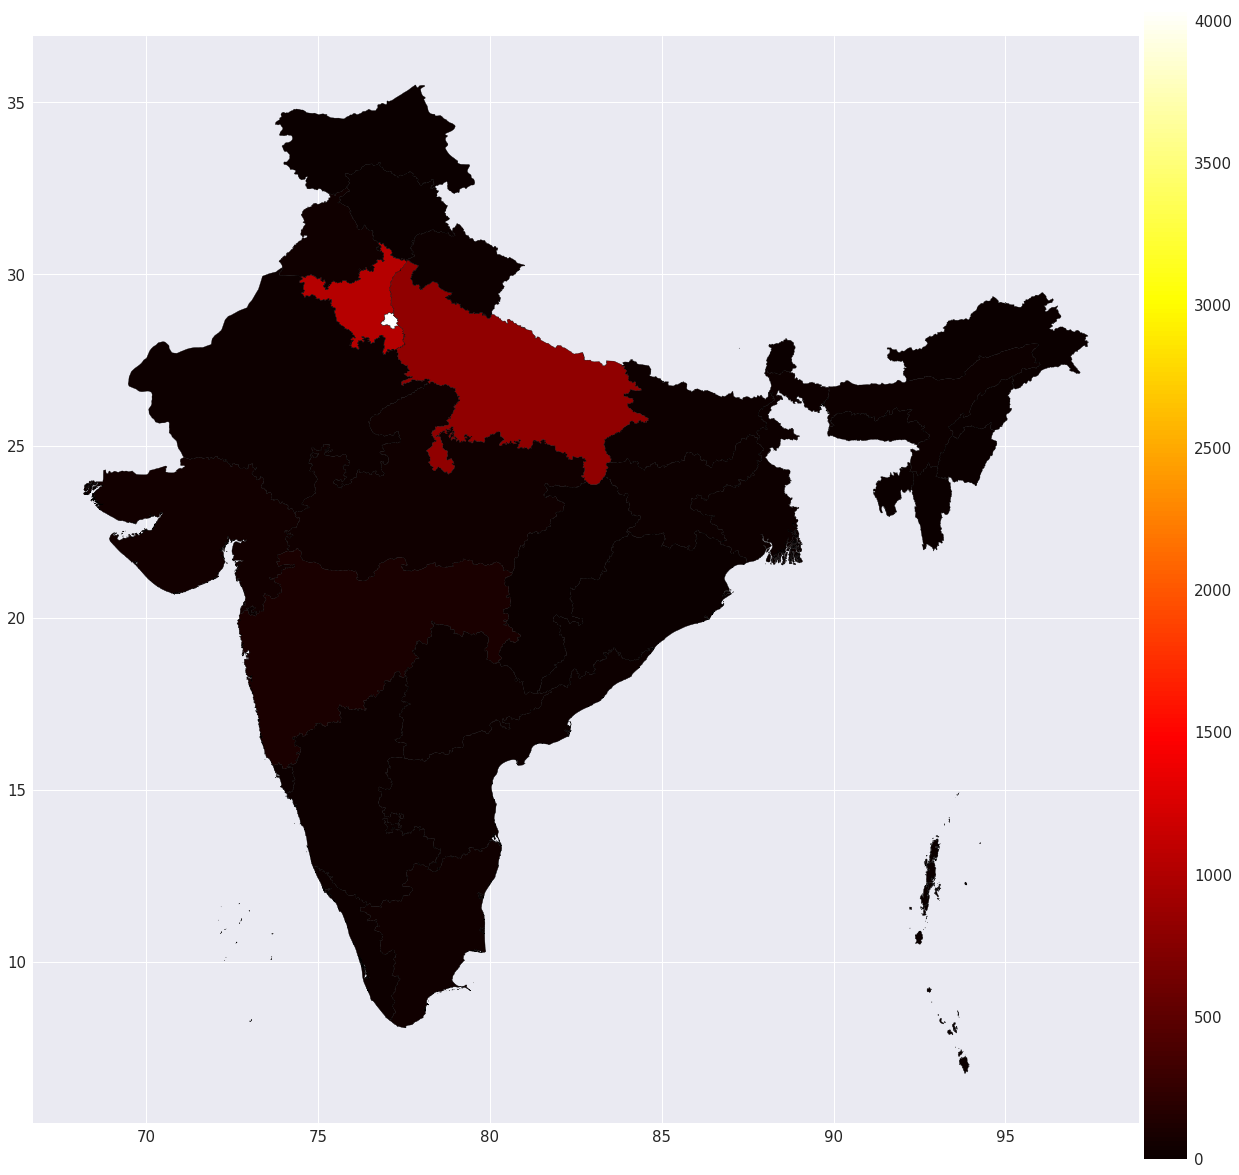

In [101]:
vmin, vmax = 0.0, 4048.0
ax = india_map_with_restaurants.plot(figsize = (20, 20),edgecolor ='black', column = 'restaurants', cmap = 'hot', vmin = vmin, vmax = vmax)
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='hot', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable
sm._A = []
fig.colorbar(sm, cax=cax)


In [75]:
import plotly.graph_objs as go
data = [go.Bar(
            x=india_map_with_restaurants['NAME_1'],
            y=india_map_with_restaurants['restaurants']
    )]

iplot(data, filename='basic-bar')

In [76]:
india_map_with_restaurants['restaurants'].sum()

6492

Three states, Delhi, Haryana and Uttar Pradesh, stand out that in terms of number of restaurants that have been rated by Zomato users. Particularly Delhi has more than half of the restaurants that have been rated on Zomato which makes it important to study the distribution of restaurants in Delhi alone. Indeed one should be able to tell a lot about the popularity of the restaurants (in this case the number times the restaurant has been voted will reflect the popularity of the restaurant). In the next steps of the analysis

### Analysis of Popularity of restaurants in Delhi

Let us first load a map of Delhi preferably with the road network.

In [77]:
delhi_road_map = gpd.read_file('delhi_highway/delhi_highway.shp')
delhi_map_adm = gpd.read_file('delhi_administrative/delhi_administrative.shp')
delhi_road_map = delhi_road_map.to_crs(delhi_map_adm.crs)

In [78]:
delhi = gpd.read_file('delhi_map_full.geojson')

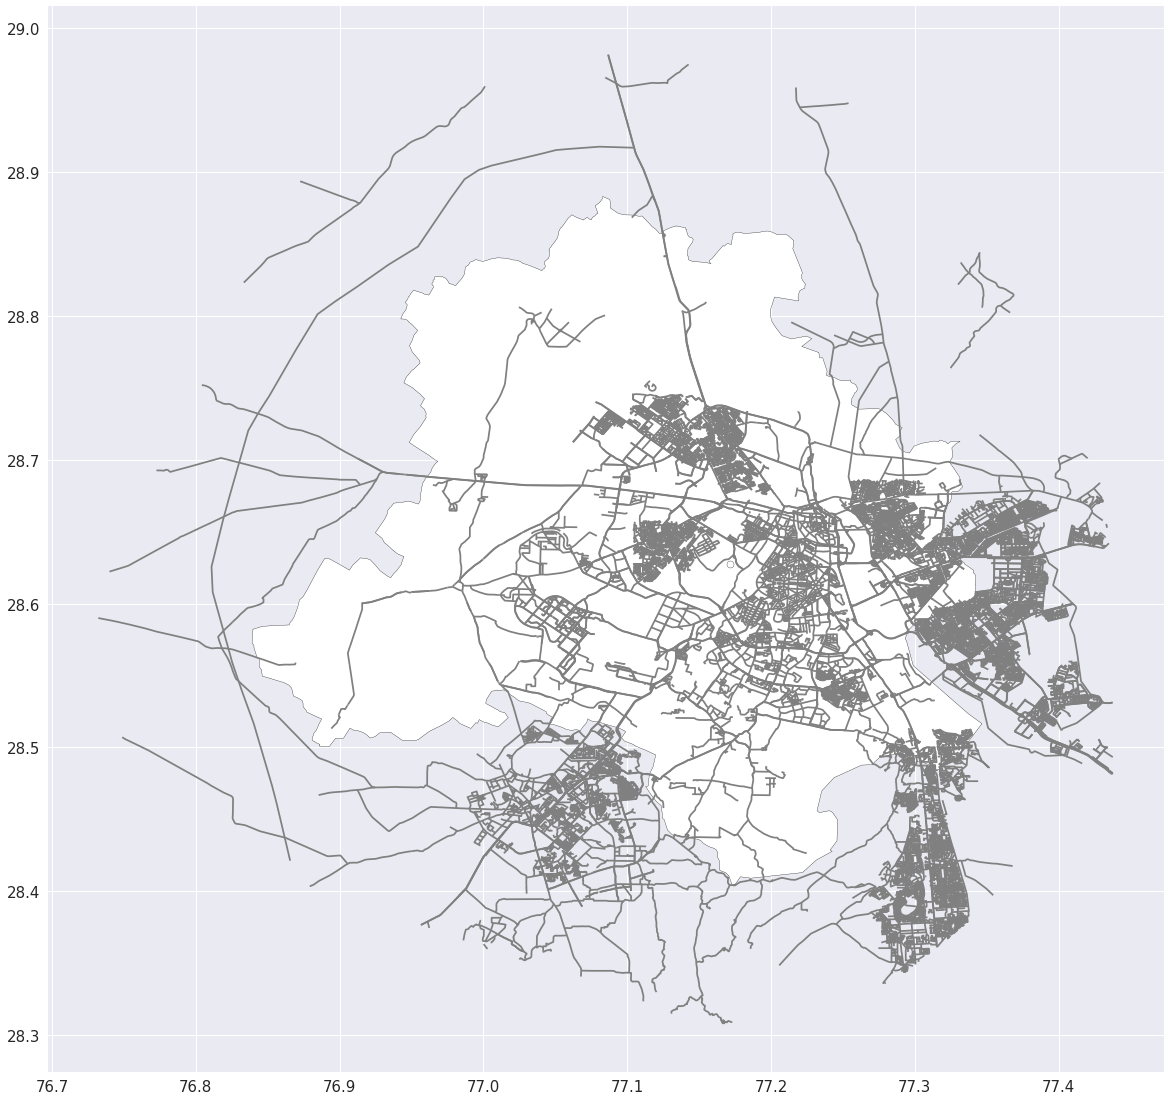

In [79]:
delhi_road_map = delhi_road_map.to_crs(delhi.crs)
base = delhi.plot(color = 'white', edgecolor = 'black', figsize = (20, 20))
delhi_road_map.plot(ax = base, color = 'gray')